# Mnist classification

### Exercise objectives
- Implement a CNN architecture with convolution layers
- Run a Neural Network on images

<hr>
<hr>

Let's imagine for a moment that you are working for the postal office (and you're in 1970 / 1980). You deal everyday with a enourmous amont of letters, and you want to automate the process of reading the numbers that have been handwritten. This task, called the _Handwriting Recognition_, has been a very complex that has been handled by Bell Labs (among other) where Yann Le Cun used to work, and where such things have been developed : 

![Number recognition](recognition.gif)


The idea is that you have an image (not a video: the animation is here to present what happens with different images) as an input and you try to predict the figure on the image - it corresponds to a classification task, where the output is the class (=figure) the image belongs to, from 0 to 9.

This task used to be quite complex back in the time, and still is a benchmark on which a lot of people work. For this reason, the MNIST (for *Modified ou Mixed National Institute of Standards and Technology*) dataset has been created: it corresponds to digit images, from 0 to 9. 

You goal in this notebook is to build a Convolution Neural Network that can work on such images and predict the corresponding class of each digit image. Keep in mind that this CNN will make you classify hand-written digits, which was a very complex task till the 90's. 

## The data

Keras provides multiple datasets within the Python package. You can load it with the following commands:

In [1]:
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

❓ Question ❓ Let's look at some of the data. 

Select some of the values of the train set and plot them thanks to the `imshow` function from matplotlib with `cmap` set to `gray`(otherwise, the displayed colors are just some arrangement Matplotlib does, which does not exist in practice).

In [2]:
from matplotlib import pyplot as plt
X_train.shape

(60000, 28, 28)

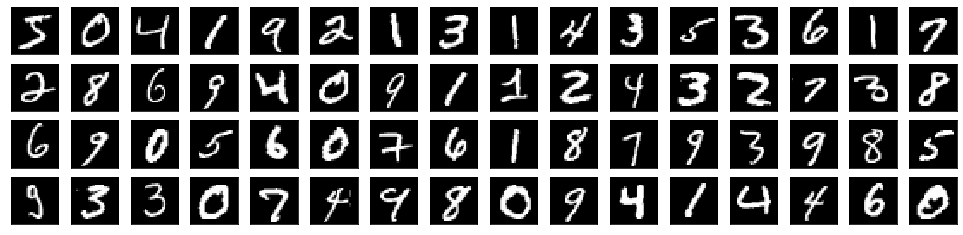

In [3]:
for i in range(64):
    plt.rcParams["figure.figsize"] = (17,4)
    plt.subplot(4,16,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='nearest', filterrad=4.0, filternorm=False)#X[i:][i//64]
    plt.xticks([]), plt.yticks([])

Remember that neural networks converge faster when the input data are somehow normalized? It goes similarly for input images. 

❓ Question ❓ As a first preprocessing step, you should normalize your data. For images, it simply implies to divide your input data by the maximal value, i.e. 255. Don't forget to do it on your train and test data.

(N.B.: you can also centered your data, by substracting 0.5 but it is not mandatory). 

In [4]:
X_train, X_test = X_train/255, X_test/255
X_train, X_test = X_train-0.5, X_test-0.5

In [5]:
X_train[4:6][1][6]

array([-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.37058824,  0.09215686,
        0.31568627,  0.48823529,  0.48823529,  0.48823529,  0.07254902,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       ])

❓ Question ❓ What is the shape of your images?

In [6]:
X_train[1].shape

(28, 28)

You see that you have 60.000 training images, all of size (28, 28). However, Keras needs images whose last dimension is the number of channels, which is missing here.

❓ Question ❓ Use the `expand_dims` to add one dimension at the end of the training and test data. Then, print the shape of X_train and X_test that should respectively be (60000, 28, 28, 1) and (10000, 28, 28, 1).

In [7]:
import numpy as np
X_train = X_train.reshape(-1,28,28,1)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
X_test[0][23]

array([[-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [ 0.02156863],
       [ 0.49607843],
       [ 0.49607843],
       [-0.29607843],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ],
       [-0.5       ]])

A last thing to do to prepare your data is to convert your labels to one-hot encoded categories.

❓ Question ❓ Use `to_categorical` to transform your labels. Store the results in `y_train_cat` and `y_test_cat`.

In [10]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [11]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The data are now ready to be used.

## The Convolutional Neural Network _aka_ CNN

Now, build a Convolutional Neural Network. 

❓ Question ❓ Based on the course, build a neural network that has:
- a `Conv2D` layer with 8 filters, each of size (4, 4), with an input shape suitable for your task, the relu activation function, and padding='same' so as to 
- a `MaxPool2D` layer with a pool_size of (2, 2)
- a second `Conv2D` layer with 16 filters, each of size (3, 3), and the relu activation function
- a second `MaxPool2D` layer with a pool_size of (2, 2)
- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the relu activation function
- a last layer that is suited for your task

In the function, do not forget to include the compilation of the model, which optimizes the `categorical_crossentropy` with the adam optimizer - and the accuracy should be among the metrics.

In [12]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
print(tf.__version__)

2.3.0


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers # import RMSprop & Adam
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
def initialize_model():
    model = models.Sequential()
    model.add(layers.Conv2D(filters=8, kernel_size=(4,4), padding='Same', activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2))) ### Max-pooling
    model.add(layers.Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(10, activation = "softmax")) ### Classification with 10 output  
    return (model)


def compile_model(model, optimizer_name, loss_metric, metric):
    model.compile(optimizer=optimizer_name, loss=loss_metric, metrics=[metric])    
    return model

❓ Question ❓ How many trainable parameters are there in your model?
- Compute them with `model.summary()` first
- Recompute them manually layer per layer then

In [15]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

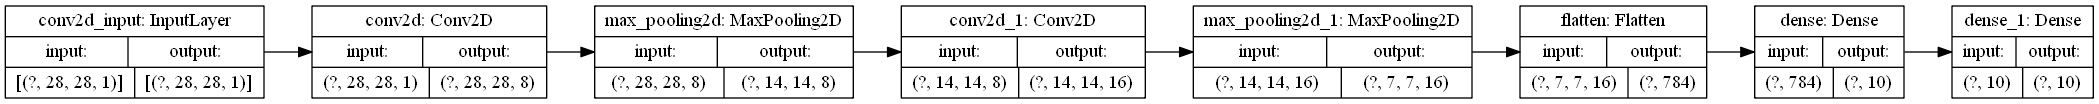

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, rankdir='LR', show_layer_names=True)
from IPython.display import Image
Image("model.png")

❓ Question ❓ Initialize your model and fit it on the train data. 
- Do not forget to use a validation set and an early stopping criterion. 
- Limit at 5 epoch max in this challenge (just to save time)

In [17]:
ini_lr = 0.001
lr_decay = 0.7
decay_stp = 5000
lr_schedule = schedules.ExponentialDecay(ini_lr, decay_steps=decay_stp, decay_rate=lr_decay, staircase=False)
optimizer_name = optimizers.Adam(learning_rate=lr_schedule)
loss_metric = 'categorical_crossentropy'
metric = 'accuracy'

In [18]:
model = initialize_model()
model = compile_model(model, optimizer_name, loss_metric, metric)

In [19]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
epochs = 10
batch = 256

history = model.fit(X_train, y_train_cat, batch_size=batch, epochs=epochs, 
                    validation_split=0.3, verbose=1, callbacks=[es])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
165/165 [==============================] - 34s 203ms/step - loss: 1.0868 - accuracy: 0.6641 - val_loss: 0.4059 - val_accuracy: 0.8787
Epoch 2/10
165/165 [==============================] - 33s 201ms/step - loss: 0.3454 - accuracy: 0.8973 - val_loss: 0.2680 - val_accuracy: 0.9186
Epoch 3/10
165/165 [==============================] - 34s 208ms/step - loss: 0.2369 - accuracy: 0.9306 - val_loss: 0.1954 - val_accuracy: 0.9422
Epoch 4/10
165/165 [==============================] - 34s 206ms/step - loss: 0.1787 - accuracy: 0.9474 - val_loss: 0.1596 - val_accuracy: 0.9521
Epoch 5/10
165/165 [==============================] - 35s 210ms/step - loss: 0.1483 - accuracy: 0.9568 - val_loss: 0.1411 - val_accuracy: 0.9556
Epoch 6/10
165/165 [==============================] - 34s 209ms/step - loss: 0.1249 - accuracy: 0.9625 - val_loss: 0.1182 - val_accuracy: 0.9631
Epoch 7/10
165/165 [==============================] - 34s 207ms/step - loss: 0.1126 - accuracy: 0.9663 - val_loss: 0.1072 - val_ac

You probably see that the model converges within few epochs. The reason is that there are as many weight update as there are batches within each epoch. For instance, if you batch_size is of 32, you have 60.000/32 = 1875 updates.


❓ Question ❓ What is your accuracy on the test set?

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [20]:
accuracy_on_test = model.evaluate(X_test, y_test_cat)[1]
accuracy_on_test

313/313 [==============================] - 7s 21ms/step - loss: 0.0870 - accuracy: 0.9708


0.97079998254776

In [27]:
proba_results = model.predict(X_test)
value_results = np.argmax(proba_results,axis=1) # Index having highest probability value

value_results[0], proba_results[0]

(7,
 array([9.9774832e-12, 1.4016635e-08, 2.0289608e-07, 4.4047188e-06,
        2.5275205e-07, 1.4597081e-12, 2.1270615e-08, 9.9997914e-01,
        1.3474615e-06, 1.4639459e-05], dtype=float32))

In [25]:
import pandas as pd

real_value = pd.Series(y_test, name="Real_value")
prediction = pd.Series(value_results, name="Predicted_value")
df_comparison = pd.concat([real_value, prediction], axis=1)

df_comparison['accurate'] = df_comparison['Real_value']==df_comparison['Predicted_value']
df_comparison['accurate'].value_counts()

True     9708
False     292
Name: accurate, dtype: int64

In [28]:
value_results[0:64]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3],
      dtype=int64)

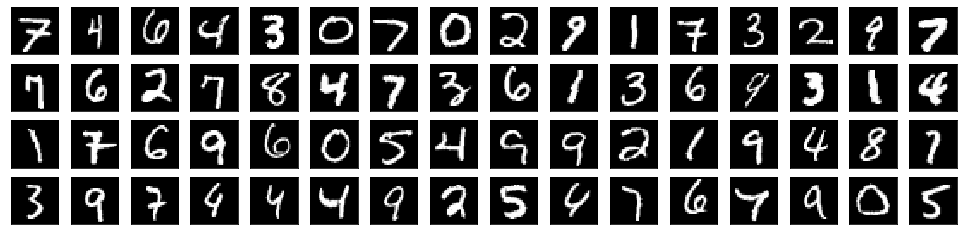

In [34]:
for i in range(64):
    plt.rcParams["figure.figsize"] = (17,4)
    plt.subplot(4,16,i+1)
    plt.imshow(X_test[i+64], cmap='gray', interpolation='nearest', filterrad=4.0, filternorm=False)#X[i:][i//64]
    plt.xticks([]), plt.yticks([])

In [31]:
# Amount of accurate and inaccurate prediction amongst the 64 digits sample
df_comparison.loc[64:127, 'accurate'].value_counts()

True     62
False     2
Name: accurate, dtype: int64

In [32]:
# Index and value of the digit wrongly predicted
df_comparison.iloc[64:127, 1][df_comparison['accurate']==False]

92    4
95    7
Name: Predicted_value, dtype: int64

In [37]:
df_comparison.iloc[[92,95], :]

,Real_value,Predicted_value,accurate
92,9,4,False
95,4,7,False


### You should be already impressed by your skills! You solved what was a very hard problem 30 years ago with your CNN.

🏁 Congratulation!


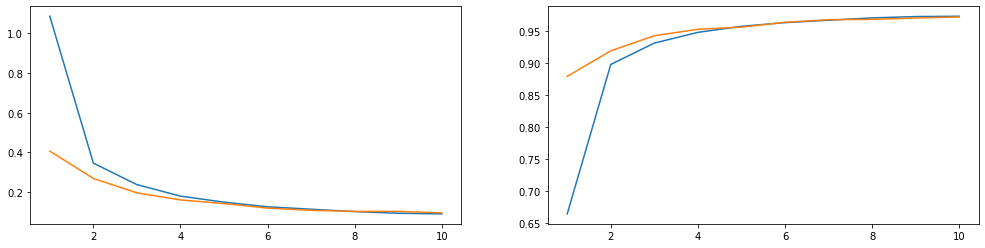

In [40]:
history_dict = history.history
loss, validation_loss = history_dict['loss'], history_dict['val_loss']
accuracy, validation_accuracy = history_dict['accuracy'], history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(1)
ax_loss, ax_accuracy = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)
ax_loss.plot(epochs, loss, label='Training loss')
ax_loss.plot(epochs, validation_loss, label='Validation loss')
ax_accuracy.plot(epochs, accuracy, label='Training accuracy')
ax_accuracy.plot(epochs, validation_accuracy, label='Validation accuracy')
ax_loss.xlabel = 'Epoch'
ax_loss.ylabel = 'Loss'
ax_accuracy.xlabel = 'Epoch'
ax_accuracy.ylabel = 'Accuracy'
plt.show()